In [116]:
import pandas as pd
import matplotlib.pyplot as plt

population_data = pd.read_csv("population_state.csv")
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [117]:
population_data["year"] = pd.to_datetime(population_data["date"]).dt.year
population_data.head()

,state,date,sex,age,ethnicity,population,year
0,Johor,1970-01-01,both,overall,overall,1325.6,1970
1,Johor,1970-01-01,both,0-4,overall,210.1,1970
2,Johor,1970-01-01,both,5-9,overall,215.7,1970
3,Johor,1970-01-01,both,10-14,overall,192.2,1970
4,Johor,1970-01-01,both,15-19,overall,152.8,1970


In [118]:
population_data = population_data[(population_data["age"] == "overall") &
                                          (population_data["sex"] == "both") & 
                                          (population_data['ethnicity'] != "overall")]
population_data.head()

,state,date,sex,age,ethnicity,population,year
481,Johor,1980-01-01,both,overall,bumi,899.7,1980
482,Johor,1980-01-01,both,overall,chinese,634.7,1980
483,Johor,1980-01-01,both,overall,indian,109.3,1980
484,Johor,1980-01-01,both,overall,other,2.5,1980
751,Johor,1981-01-01,both,overall,bumi,925.4,1981


In [119]:
ETHNICITY_MAP = {
    'bumi' : 'Bumiputera',
    'bumi_malay': 'Bumiputera',
    'bumi_other': 'Bumiputera',
    'chinese': 'Chinese',
    'indian': 'Indian',
    'other': 'Other',
    'other_citizen': 'Other',
    'other_noncitizen': 'Other'
}

population_data["ethnicity_group"] = population_data["ethnicity"].map(ETHNICITY_MAP)
population_data.head()

,state,date,sex,age,ethnicity,population,year,ethnicity_group
481,Johor,1980-01-01,both,overall,bumi,899.7,1980,Bumiputera
482,Johor,1980-01-01,both,overall,chinese,634.7,1980,Chinese
483,Johor,1980-01-01,both,overall,indian,109.3,1980,Indian
484,Johor,1980-01-01,both,overall,other,2.5,1980,Other
751,Johor,1981-01-01,both,overall,bumi,925.4,1981,Bumiputera


Obtain population by ethnicity in Malaysia

In [120]:
malaysia_ethnicity_data = population_data.groupby(
    ["year", "ethnicity_group"])["population"].sum().reset_index()
malaysia_ethnicity_data

,year,ethnicity_group,population
0,1980,Bumiputera,7926.6
1,1980,Chinese,4460.1
2,1980,Indian,1189.9
3,1980,Other,302.7
4,1981,Bumiputera,8200.7
...,...,...,...
179,2024,Other,3627.8
180,2025,Bumiputera,21761.0
181,2025,Chinese,6849.6
182,2025,Indian,2006.2


In [121]:
malaysia_ethnicity_data_pt = malaysia_ethnicity_data.pivot_table("population", index = "year", columns = ["ethnicity_group"], aggfunc="sum")
malaysia_ethnicity_data_pt

ethnicity_group,Bumiputera,Chinese,Indian,Other
year,,,,
1980,7926.6,4460.1,1189.9,302.7
1981,8200.7,4520.9,1212.8,322.3
1982,8489.4,4581.6,1236.6,343.6
1983,8786.6,4637.7,1258.8,365.0
1984,9093.4,4690.7,1280.0,386.5
1985,9425.7,4747.0,1301.2,408.9
1986,9774.2,4800.1,1323.5,431.2
1987,10127.7,4845.1,1346.9,453.6
1988,10480.5,4893.5,1368.3,477.3


Reset index

In [122]:
malaysia_ethnicity_data_pt_copy = malaysia_ethnicity_data_pt.reset_index()
malaysia_ethnicity_data_pt_copy

ethnicity_group,year,Bumiputera,Chinese,Indian,Other
0,1980,7926.6,4460.1,1189.9,302.7
1,1981,8200.7,4520.9,1212.8,322.3
2,1982,8489.4,4581.6,1236.6,343.6
3,1983,8786.6,4637.7,1258.8,365.0
4,1984,9093.4,4690.7,1280.0,386.5
5,1985,9425.7,4747.0,1301.2,408.9
6,1986,9774.2,4800.1,1323.5,431.2
7,1987,10127.7,4845.1,1346.9,453.6
8,1988,10480.5,4893.5,1368.3,477.3
9,1989,10824.5,4948.2,1387.8,501.5


Text(0.5, 0, 'Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses\n in 2020 and 2021.')

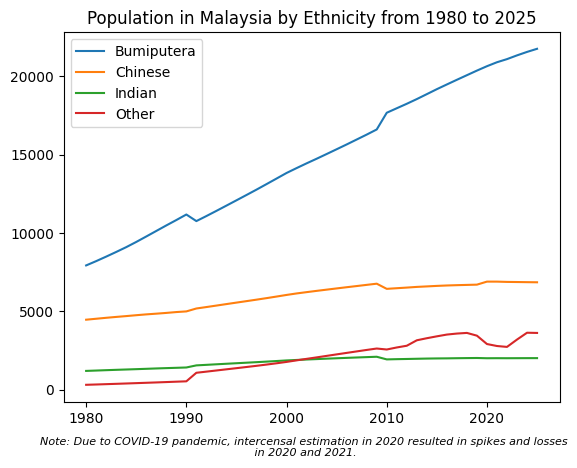

In [123]:
fig, ax = plt.subplots()

ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt_copy["Bumiputera"], label = "Bumiputera")
ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt_copy["Chinese"], label = "Chinese")
ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt_copy["Indian"], label = "Indian")
ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt_copy["Other"], label = "Other")
plt.title("Population in Malaysia by Ethnicity from 1980 to 2025")
ax.legend()
plt.figtext(
    0.5, 0, 
    "Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses\n in 2020 and 2021.",
    wrap=True, ha='center', fontsize=8, style='italic'
)

Ethnicity Proportion

In [124]:
malaysia_ethnicity_data_pt = malaysia_ethnicity_data_pt_copy.set_index("year")
malaysia_ethnicity_data_pt

ethnicity_group,Bumiputera,Chinese,Indian,Other
year,,,,
1980,7926.6,4460.1,1189.9,302.7
1981,8200.7,4520.9,1212.8,322.3
1982,8489.4,4581.6,1236.6,343.6
1983,8786.6,4637.7,1258.8,365.0
1984,9093.4,4690.7,1280.0,386.5
1985,9425.7,4747.0,1301.2,408.9
1986,9774.2,4800.1,1323.5,431.2
1987,10127.7,4845.1,1346.9,453.6
1988,10480.5,4893.5,1368.3,477.3


In [125]:
total = malaysia_ethnicity_data_pt["Bumiputera"] + malaysia_ethnicity_data_pt["Chinese"] + malaysia_ethnicity_data_pt["Indian"] + malaysia_ethnicity_data_pt["Other"]
malaysia_ethnicity_data_pt["B_percent"] = malaysia_ethnicity_data_pt["Bumiputera"] / total
malaysia_ethnicity_data_pt["C_percent"] = malaysia_ethnicity_data_pt["Chinese"] / total
malaysia_ethnicity_data_pt["I_percent"] = malaysia_ethnicity_data_pt["Indian"] / total
malaysia_ethnicity_data_pt["O_percent"] = malaysia_ethnicity_data_pt["Other"] / total
malaysia_ethnicity_data_pt

ethnicity_group,Bumiputera,Chinese,Indian,Other,B_percent,C_percent,I_percent,O_percent
year,,,,,,,,
1980,7926.6,4460.1,1189.9,302.7,0.571109,0.321349,0.085732,0.021809
1981,8200.7,4520.9,1212.8,322.3,0.575217,0.317107,0.085069,0.022607
1982,8489.4,4581.6,1236.6,343.6,0.579434,0.312712,0.084403,0.023452
1983,8786.6,4637.7,1258.8,365.0,0.583901,0.308192,0.083652,0.024256
1984,9093.4,4690.7,1280.0,386.5,0.588547,0.303593,0.082845,0.025015
1985,9425.7,4747.0,1301.2,408.9,0.593453,0.298877,0.081925,0.025745
1986,9774.2,4800.1,1323.5,431.2,0.598579,0.293962,0.081052,0.026407
1987,10127.7,4845.1,1346.9,453.6,0.603799,0.288858,0.080300,0.027043
1988,10480.5,4893.5,1368.3,477.3,0.608638,0.284182,0.079462,0.027718


In [126]:
malaysia_ethnicity_data_pt = malaysia_ethnicity_data_pt.reset_index()

Text(0.5, 0, 'Note: There are spikes due to intercensal adjustments (years divisible by 10), govenrment policies\n and COVID-19 pandemic (2020, 2021)')

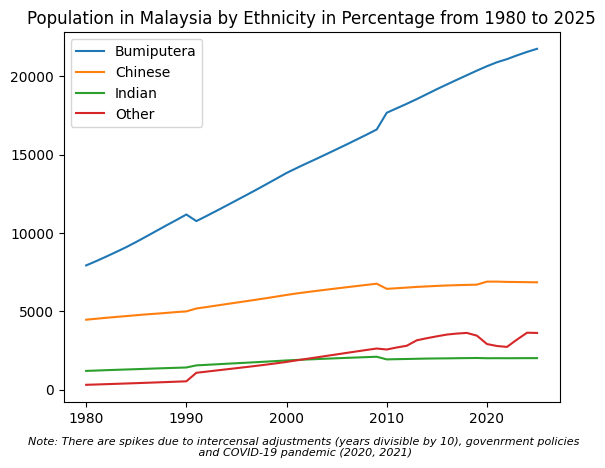

In [127]:
fig, ax = plt.subplots()

ax.plot(malaysia_ethnicity_data_pt["year"], malaysia_ethnicity_data_pt["Bumiputera"], label = "Bumiputera")
ax.plot(malaysia_ethnicity_data_pt["year"], malaysia_ethnicity_data_pt["Chinese"], label = "Chinese")
ax.plot(malaysia_ethnicity_data_pt["year"], malaysia_ethnicity_data_pt["Indian"], label = "Indian")
ax.plot(malaysia_ethnicity_data_pt["year"], malaysia_ethnicity_data_pt["Other"], label = "Other")
plt.title("Population in Malaysia by Ethnicity in Percentage from 1980 to 2025")
ax.legend()
plt.figtext(
    0.5, 0, 
    "Note: There are spikes due to intercensal adjustments (years divisible by 10), govenrment policies\n and COVID-19 pandemic (2020, 2021)",
    wrap=True, ha='center', fontsize=8, style='italic'
)

Bumiputera has the highest population proportion in Malaysia

Proportion of Chinese and Indian decreased over time

Text(0.5, 0, 'Note: There are spikes due to intercensal adjustments (years divisible by 10), govenrment policies\n and COVID-19 pandemic (2020, 2021)')

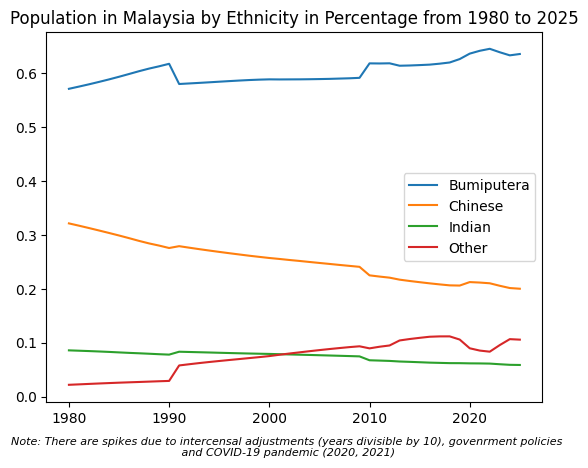

In [128]:
fig, ax = plt.subplots()

ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt["B_percent"], label = "Bumiputera")
ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt["C_percent"], label = "Chinese")
ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt["I_percent"], label = "Indian")
ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt["O_percent"], label = "Other")
plt.title("Population in Malaysia by Ethnicity in Percentage from 1980 to 2025")
ax.legend()
plt.figtext(
    0.5, 0, 
    "Note: There are spikes due to intercensal adjustments (years divisible by 10), govenrment policies\n and COVID-19 pandemic (2020, 2021)",
    wrap=True, ha='center', fontsize=8, style='italic'
)

Plot percentage change of population by ethnicity

In [129]:
malaysia_ethnicity_data_pt = malaysia_ethnicity_data.pivot_table("population", index = "year", columns = ["ethnicity_group"], aggfunc="sum")
malaysia_ethnicity_data_pt = malaysia_ethnicity_data_pt.pct_change()
malaysia_ethnicity_data_pt

ethnicity_group,Bumiputera,Chinese,Indian,Other
year,,,,
1980,NaN,NaN,NaN,NaN
1981,0.034580,0.013632,0.019245,0.064751
1982,0.035204,0.013427,0.019624,0.066087
1983,0.035008,0.012245,0.017952,0.062282
1984,0.034917,0.011428,0.016841,0.058904
1985,0.036543,0.012002,0.016563,0.057956
1986,0.036973,0.011186,0.017138,0.054537
1987,0.036167,0.009375,0.017680,0.051948
1988,0.034835,0.009989,0.015888,0.052249


In [130]:
malaysia_ethnicity_data_pt_copy = malaysia_ethnicity_data_pt.reset_index()
malaysia_ethnicity_data_pt_copy

ethnicity_group,year,Bumiputera,Chinese,Indian,Other
0,1980,NaN,NaN,NaN,NaN
1,1981,0.034580,0.013632,0.019245,0.064751
2,1982,0.035204,0.013427,0.019624,0.066087
3,1983,0.035008,0.012245,0.017952,0.062282
4,1984,0.034917,0.011428,0.016841,0.058904
5,1985,0.036543,0.012002,0.016563,0.057956
6,1986,0.036973,0.011186,0.017138,0.054537
7,1987,0.036167,0.009375,0.017680,0.051948
8,1988,0.034835,0.009989,0.015888,0.052249
9,1989,0.032823,0.011178,0.014251,0.050702


Population of Chinese also dropped after pandemic

There are spikes due to intercensal adjustments (years divisible by 10), govenrment policies and COVID-19 pandemic (2020, 2021)

Text(0.5, 0, 'Note: There are spikes due to intercensal adjustments (years divisible by 10), govenrment policies\n and COVID-19 pandemic (2020, 2021)')

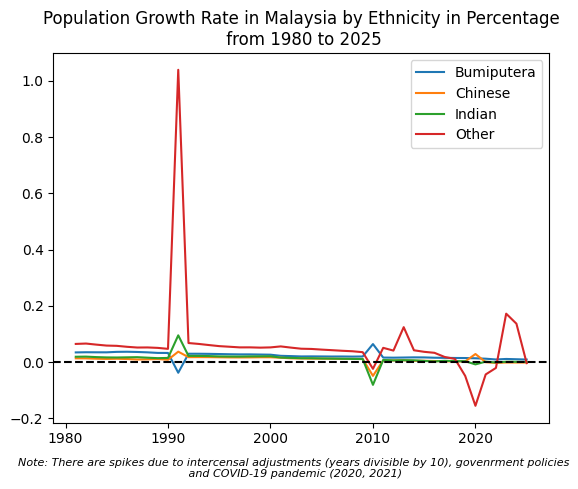

In [131]:
fig, ax = plt.subplots()

ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt_copy["Bumiputera"], label = "Bumiputera")
ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt_copy["Chinese"], label = "Chinese")
ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt_copy["Indian"], label = "Indian")
ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt_copy["Other"], label = "Other")
plt.title("Population Growth Rate in Malaysia by Ethnicity in Percentage\n from 1980 to 2025")
plt.axhline(y = 0, linestyle = "--", color = "black")
ax.legend()
plt.figtext(
    0.5, 0, 
    "Note: There are spikes due to intercensal adjustments (years divisible by 10), govenrment policies\n and COVID-19 pandemic (2020, 2021)",
    wrap=True, ha='center', fontsize=8, style='italic'
)

Limit y-axis for a better picture

Text(0.5, 0, 'Note: There are spikes due to intercensal adjustments (years divisible by 10), govenrment policies\n and COVID-19 pandemic (2020, 2021)')

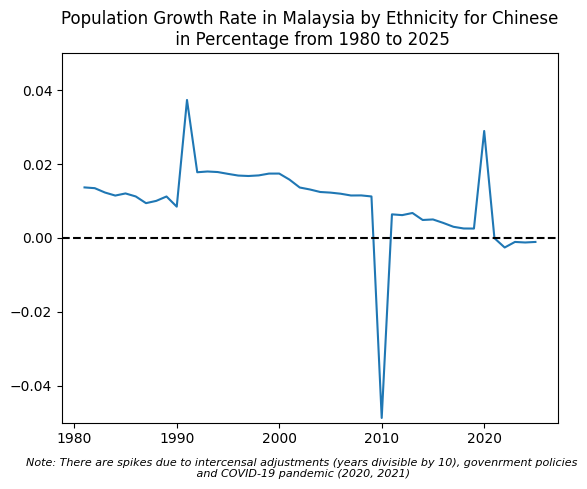

In [132]:
fig, ax = plt.subplots()

ax.plot(malaysia_ethnicity_data_pt_copy["year"], malaysia_ethnicity_data_pt_copy["Chinese"])
plt.title("Population Growth Rate in Malaysia by Ethnicity for Chinese\n in Percentage from 1980 to 2025")

plt.axhline(y = 0, linestyle = "--", color = "black")
ax.set_ylim(-0.05, 0.05)
plt.figtext(
    0.5, 0, 
    "Note: There are spikes due to intercensal adjustments (years divisible by 10), govenrment policies\n and COVID-19 pandemic (2020, 2021)",
    wrap=True, ha='center', fontsize=8, style='italic'
)